<a href="https://colab.research.google.com/github/2303a52252-collab/Exp-AI/blob/main/Ass_2_ExpAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(42)
n_samples = 600

data = pd.DataFrame({
    'Matches_Played': np.random.randint(5, 200, n_samples),
    'Runs_Scored': np.random.randint(0, 10000, n_samples),
    'Wickets_Taken': np.random.randint(0, 400, n_samples),
    'Catches': np.random.randint(0, 200, n_samples),
    'Strike_Rate': np.round(np.random.uniform(50, 150, n_samples), 2),
    'Economy_Rate': np.round(np.random.uniform(3, 10, n_samples), 2)
})
threshold_runs = 3000
threshold_wickets = 100
noise_level = 0.1

data['Player_Rating'] = np.where(
    (data['Runs_Scored'] > threshold_runs) | (data['Wickets_Taken'] > threshold_wickets),
    np.random.choice(['High', 'Low'], p=[1 - noise_level, noise_level]), # Introduce noise for "High"
    np.random.choice(['Low', 'High'], p=[1 - noise_level, noise_level])  # Introduce noise for "Low"
)
file_path_sports = '/content/cricket_player_dataset.csv'
data.to_csv(file_path_sports, index=False)

file_path_sports

'/content/cricket_player_dataset.csv'

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       120

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



/tmp/ipython-input-1107048097.py:34: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


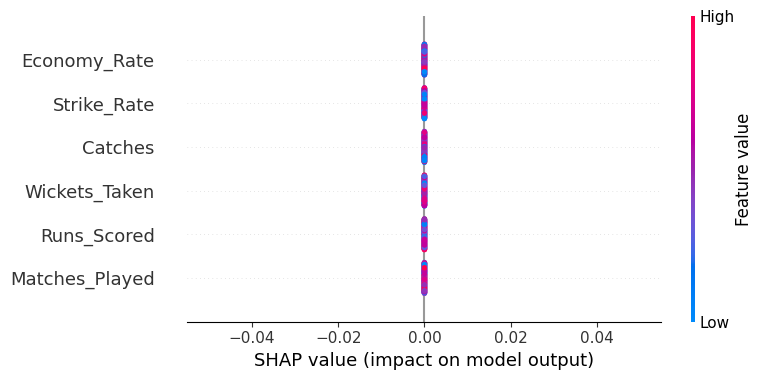

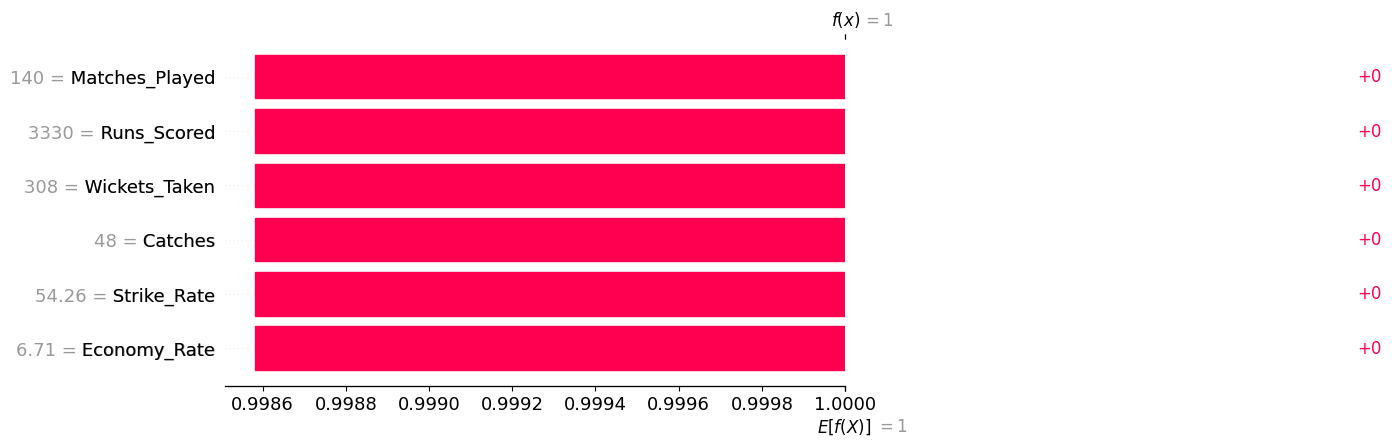

In [ ]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
df = pd.read_csv("cricket_player_dataset.csv")
X = df.drop('Player_Rating', axis=1)
y = df['Player_Rating']
y = y.map({'Low': 0, 'High': 1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)
shap.initjs()
shap.force_plot(shap_values[0])
shap.plots.waterfall(shap_values[0])
